# Introduction

This notebook is used to simulate the Fig. 3. in the paper: Cepeda, N. J., Vul, E., Rohrer, D., Wixted, J. T., & Pashler, H. (2008). Spacing Effects in Learning: A Temporal Ridgeline of Optimal Retention. Psychological Science, 19(11), 1095–1102. https://doi.org/10.1111/j.1467-9280.2008.02209.x

I find that the results are similar to the paper. The final performance as a function of gap can be fitted with mixing two forgetting curves, one for the recalled items in the re-study session, and the other for the items that are forgotten in the re-study session.

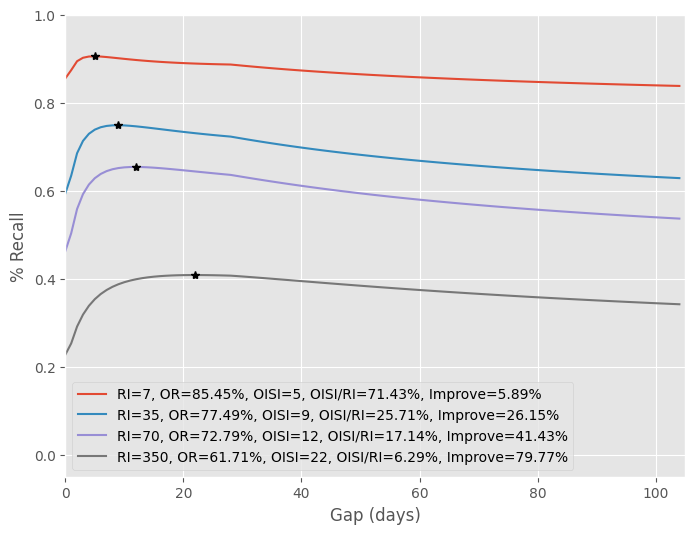

In [1]:
from fsrs_optimizer import Collection, DEFAULT_PARAMETER, power_forgetting_curve
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')
plt.figure(figsize=(8, 6))

col = Collection(DEFAULT_PARAMETER)


def performance(gap, retention_interval):
    first_rating = 3
    init_stability = col.predict("0", f"{first_rating}")[0].float()
    restudy_retention = power_forgetting_curve(gap, init_stability)
    recall_stability = col.predict(f"0,{gap}", f"{first_rating},3")[0].float()
    forget_stability = col.predict(f"0,{gap}", f"{first_rating},1")[0].float()
    recall_final_retention = power_forgetting_curve(
        retention_interval, recall_stability)
    forget_final_retention = power_forgetting_curve(
        retention_interval, forget_stability)
    final_retention = recall_final_retention * restudy_retention + \
        forget_final_retention * (1 - restudy_retention)
    return restudy_retention, final_retention


gaps = range(0, 105)
RIs = [7, 35, 70, 350]
for retention_interval in RIs:
    Rs_in_RI = []
    Rs_in_gap = []
    for gap in gaps:
        restudy_retention, final_retention = performance(
            gap, retention_interval)
        Rs_in_gap.append(restudy_retention)
        Rs_in_RI.append(final_retention)
    optimal_gap = np.argmax(Rs_in_RI)
    optimal_retention = Rs_in_gap[optimal_gap]
    ratio = optimal_gap / retention_interval
    improvement = Rs_in_RI[optimal_gap] / Rs_in_RI[0] - 1
    plt.plot(gaps, Rs_in_RI, '-',
             label=f'RI={retention_interval}, OR={optimal_retention * 100:.2f}%, OISI={optimal_gap}, OISI/RI={ratio * 100:.2f}%, Improve={improvement * 100:.2f}%')
    # Add marker at maximum point
    plt.plot(optimal_gap, Rs_in_RI[optimal_gap], '*', color='black')
plt.ylim(-0.05, 1)
plt.xlim(0, 105)
plt.ylabel("% Recall")
plt.xlabel("Gap (days)")
plt.legend()
plt.savefig("final_performance_simulated.png")
plt.show()

The original figure 3 in the paper:

![img](final_performance_original.png)